<a href="https://colab.research.google.com/github/ash-01xor/Exploratory-Data-Analysis/blob/main/Netflix_Movies_TVShows_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Netflix Movies and TV shows EDA:

Importing all the necessary libraries to perform Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Loading the Dataset:

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Kaggle_Datasets/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  relevant      8807 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 894.6+ KB


### Observations:
  

*   So there are 8807 rows and 13 columns
*   We can also see that there are null values in few columns



In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

### Checking For Null Values:


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Visuvalizing how the values are present in the dataset

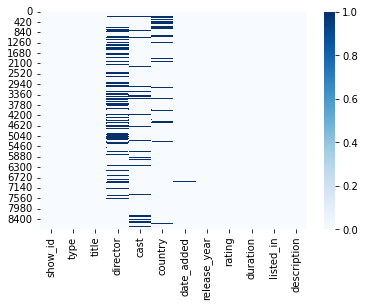

In [ ]:
sns.heatmap(df.isnull(),cmap='Blues')

Finding the Unique values present in the dataset as null values present in multiple columns.

In [ ]:
df['rating'].value_counts().unique()

array([3211, 2160,  863,  799,  490,  334,  307,  287,  220,   80,   41,
          6,    3,    1])

As there are missing values in "director" and "cast" labels , which certainly dont add any value to the analyis which we conduct. Hence we would be dropping them.

In [ ]:
df.drop(['director','cast'],axis=1,inplace=True)
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Since the columns 'country' consists of few NaN values , it needs to be filled , As netflix is a company which is headquatered in US and most of the shows are produced there , we are filling the null values by USA

In [ ]:
df['country'].replace(np.nan,'United States',inplace=True)

As each movie is added monthly , the date_added column doesnt add any significance , hence we can drop the date column

In [ ]:
df.drop(['date_added'],axis =1,inplace = True)

In [ ]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

Finding out the rating of the shows.

In [ ]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Since the 'Rating' Column consisted of few missing values it needs to be filled .We can either drop them or fill them . As 'TV-MA' occured more frequently hence we can replace all the missing nan with this.

In [ ]:
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [ ]:
df['duration'].value_counts()

1 Season     1796
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

The 'Duration' Column consisted of few missing values and since Most of the content present in the site lasted for 1-Season , we replace all the nan values with '1-Season'

In [ ]:
df['duration'].replace(np.nan,'1 Season',inplace=True)

To check how many null values are present in my dataset at this point of time

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
relevant           0
dtype: int64

We have now succesfully have dealt with all the missing data present in the dataset.

In [ ]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


We can now move on to the visualizing our dataset 

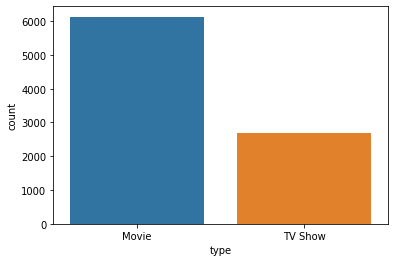

In [ ]:
sns.countplot(x='type',data= df)

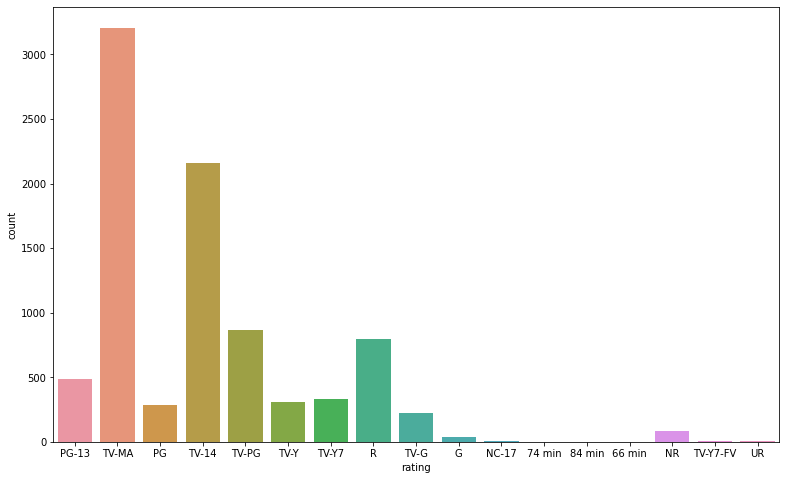

In [ ]:
plt.figure(figsize=(13,8))
sns.countplot(x='rating',data=df)

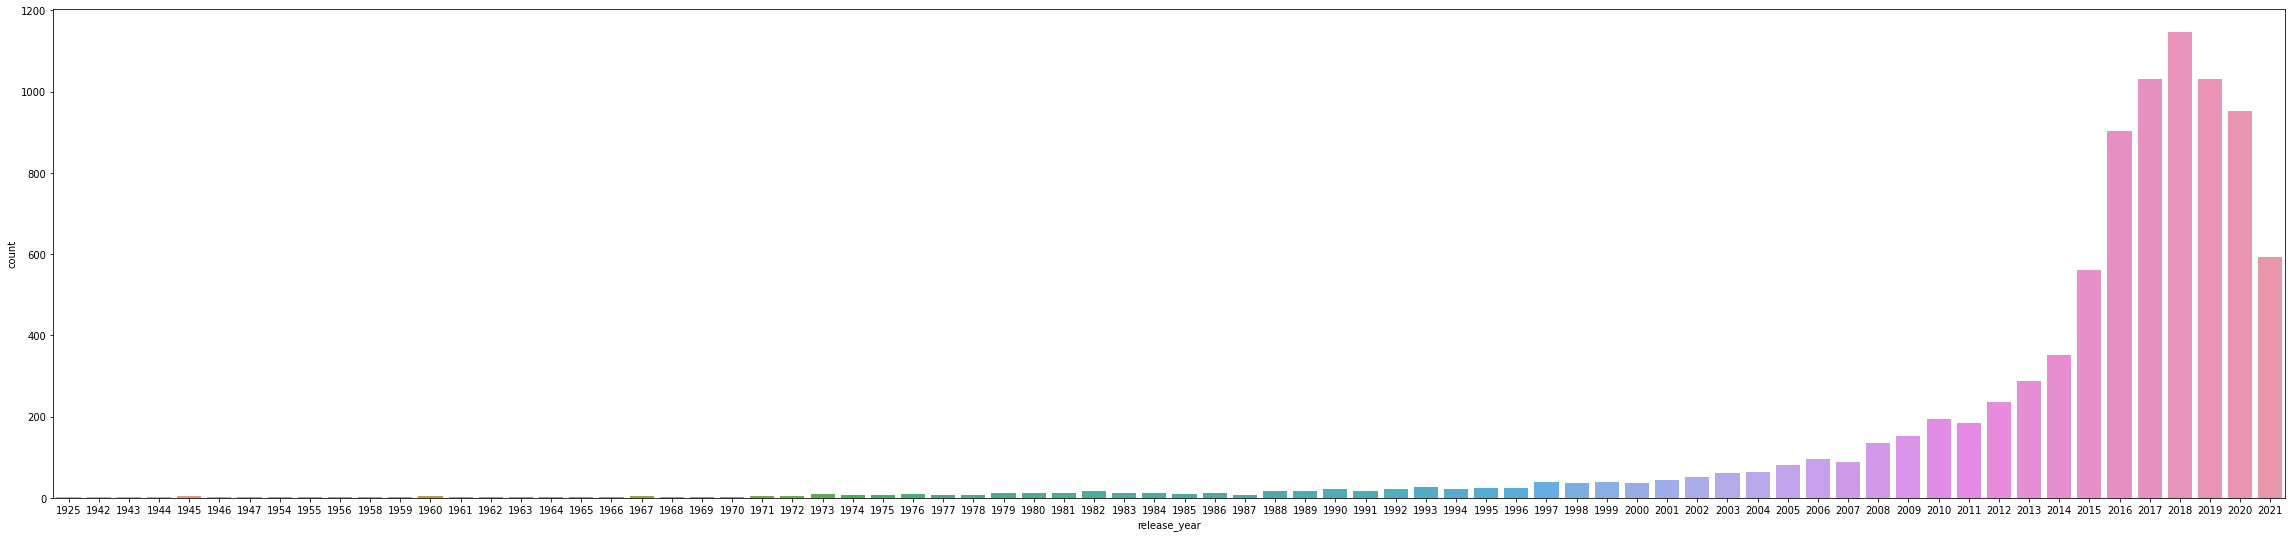

In [ ]:
plt.figure(figsize=(40,9))
sns.countplot(x='release_year',data=df)

There has been an increase in the number of shows released by netflix each year.

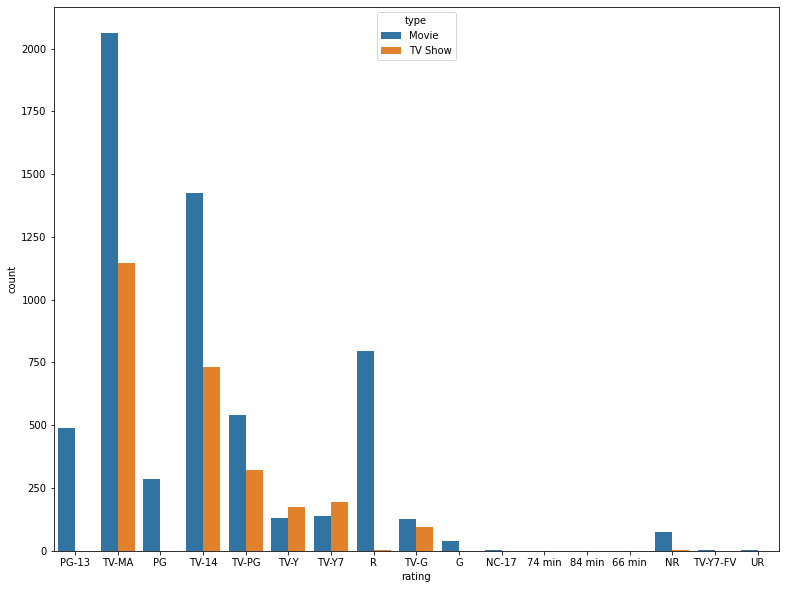

In [ ]:
plt.figure(figsize=(13,10))
sns.countplot(x='rating',data=df,hue='type')

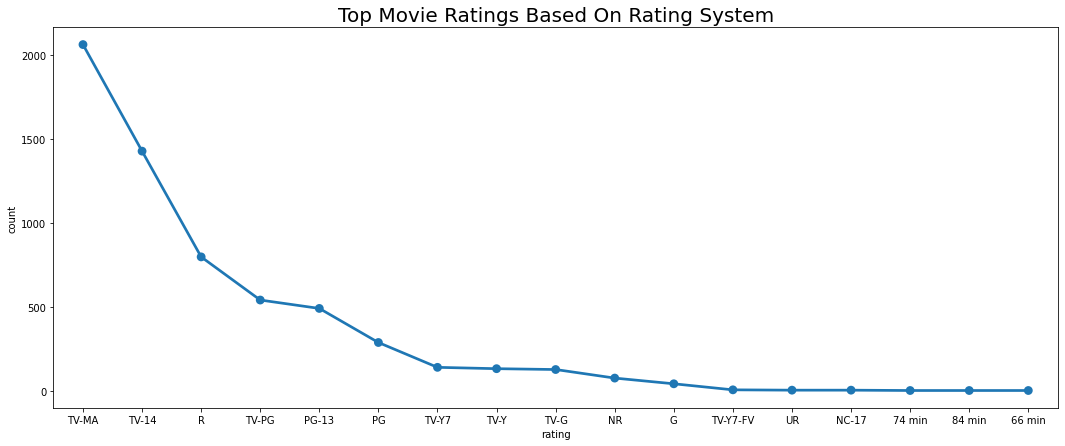

In [ ]:
df_movies = df[df["type"] == "Movie"]
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

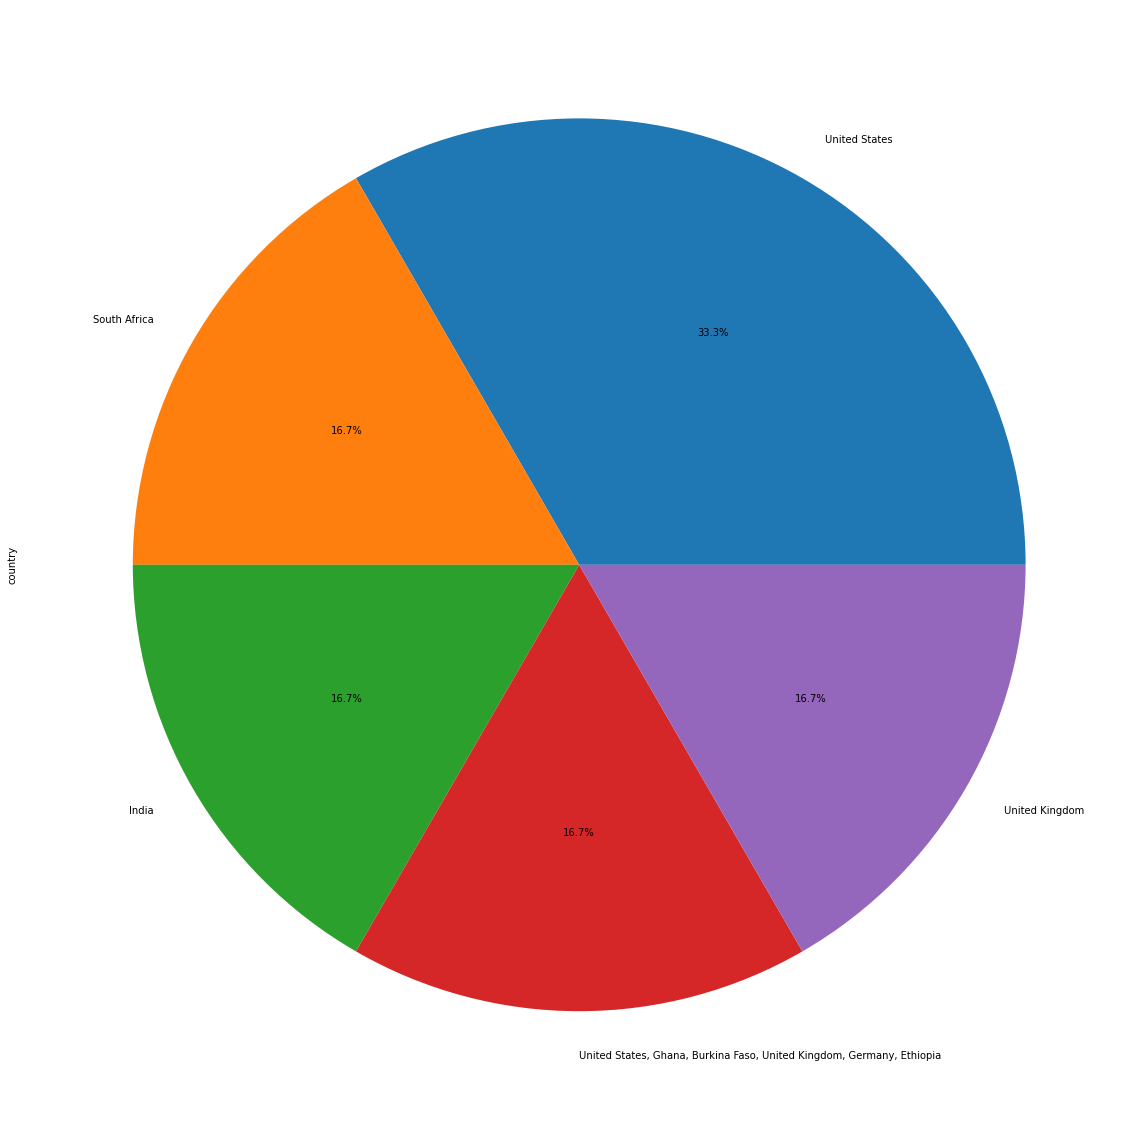

In [ ]:
df['country'][0:10].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35)) #distribution according to countries
plt.show()

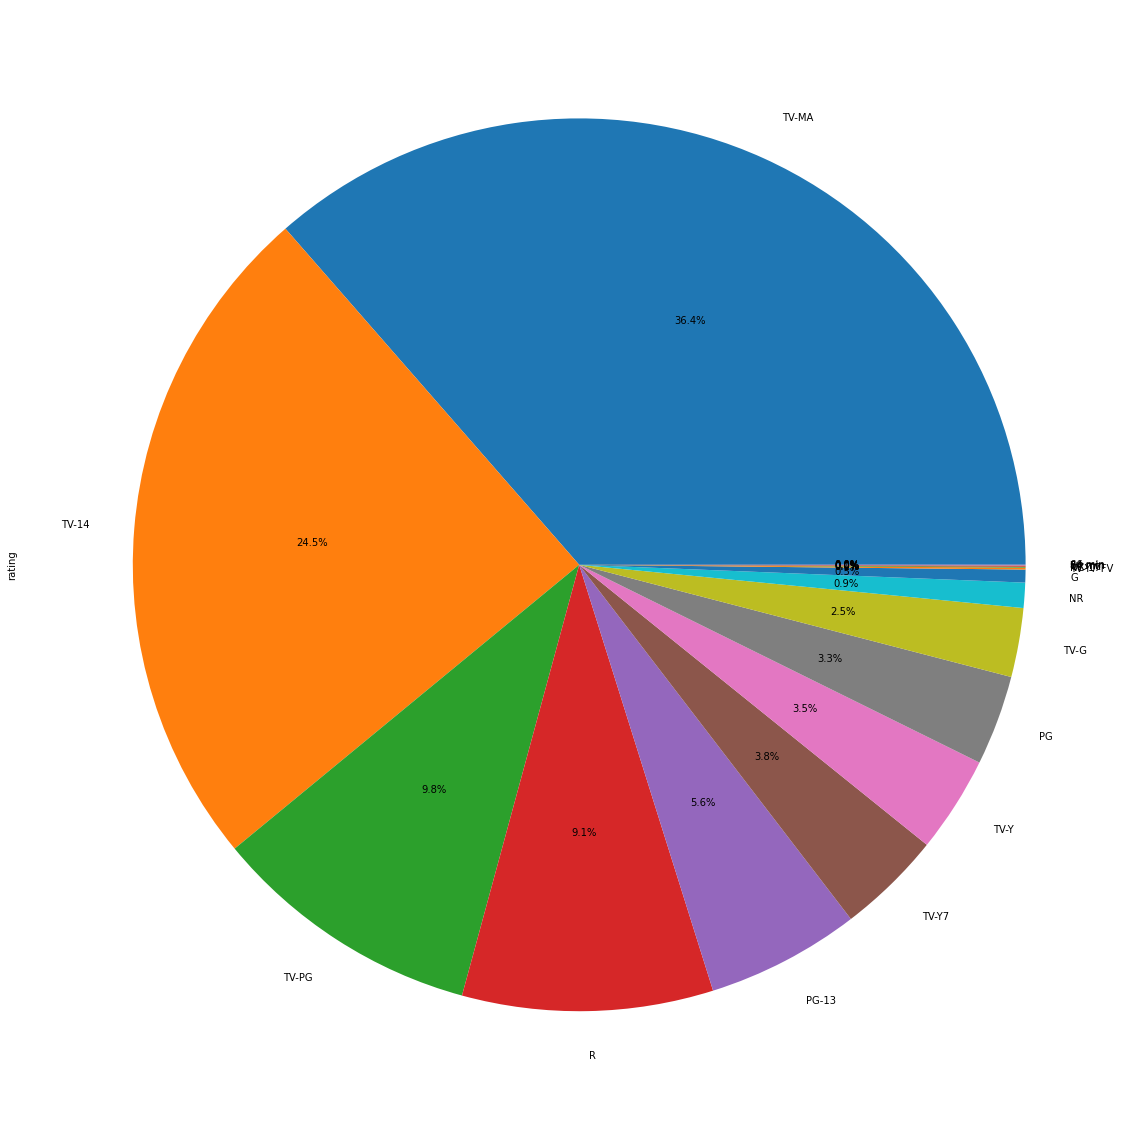

In [ ]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,50)) #distribution according to ratings
plt.show()

To find the 10 oldest movies present in the streaming platform:

In [ ]:
old = df.sort_values("release_year",ascending = True)
old[['title','release_year']][:10]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945


Finding out the number of content produced by each nation each year

In [ ]:
x=pd.DataFrame(df.country.value_counts().reset_index().values,columns=["country","count"])
x.head(10)

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


To find the number of Kids tvshows or movies are present in India:

In [ ]:
tag = "Kids' TV"
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"]=='India'][["title", "country","release_year"]].head(10)

,title,country,release_year
39,Chhota Bheem,India,2021
911,Sab Jholmaal Hai,India,2017
1429,Mighty Little Bheem: Kite Festival,India,2021
2292,Little Singham,India,2020
2664,ChuChu TV Nursery Rhymes & Kids Songs (Hindi),India,2019
2751,Akbar Birbal,India,2019
2841,Mighty Little Bheem: Festival of Colors,India,2020
3403,Mighty Little Bheem: Diwali,India,2019
8121,Super Bheem,India,2019
8172,Th Eena Meena Deeka Chase Comedy Show,India,2015


Finding out the availablity of content present in netflix which was released each year

Text(0.5, 1.0, 'Frequency of movies released each year and available in Netflix')

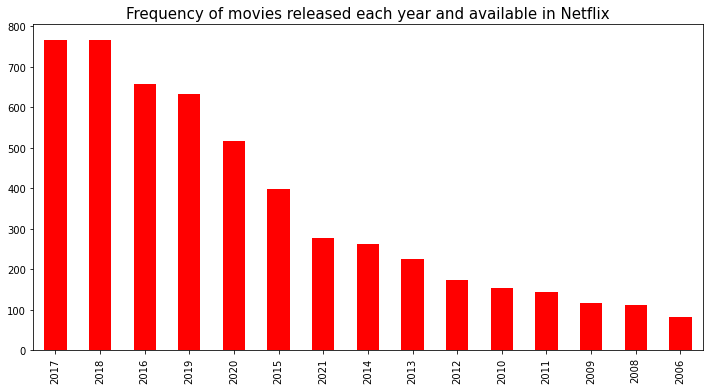

In [ ]:
plt.figure(figsize=[12,6])
df[df["type"]=="Movie"]["release_year"].value_counts()[:15].plot(kind="bar",color="Red")
plt.title("Frequency of movies released each year and available in Netflix",size=15)

Text(0.5, 1.0, 'Rating of movies and web-series preferred by viewers')

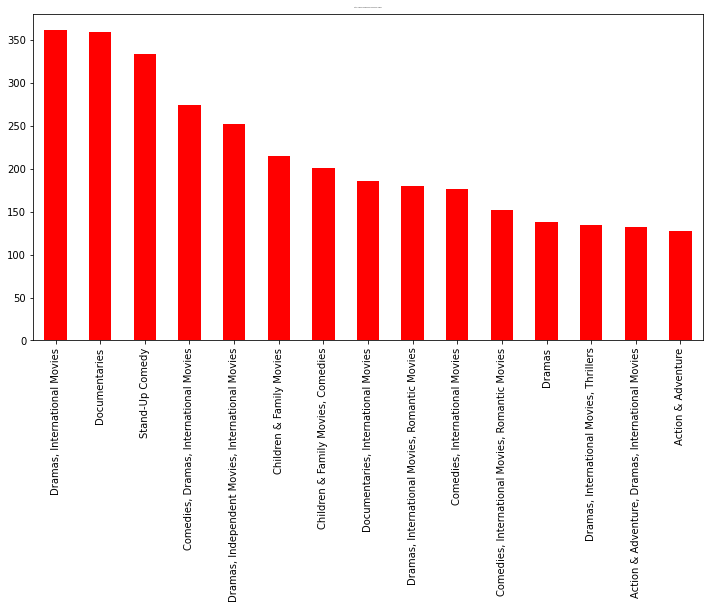

In [ ]:
plt.figure(figsize=[12,6])
df[df["type"]=="Movie"]["listed_in"].value_counts()[:15].plot(kind="bar",color="Red")
plt.title("Rating of movies and web-series preferred by viewers",size=1)